,Model,Accuracy,Precision,Recall,F1 Score,ROC AUC
0,Decision Tree,0.746753,0.746753,0.727273,0.672269,0.742424
1,Random Forest,0.720779,0.720779,0.618182,0.612613,0.812489
2,Gradient Boosting:,0.746753,0.746753,0.672727,0.654867,0.809550


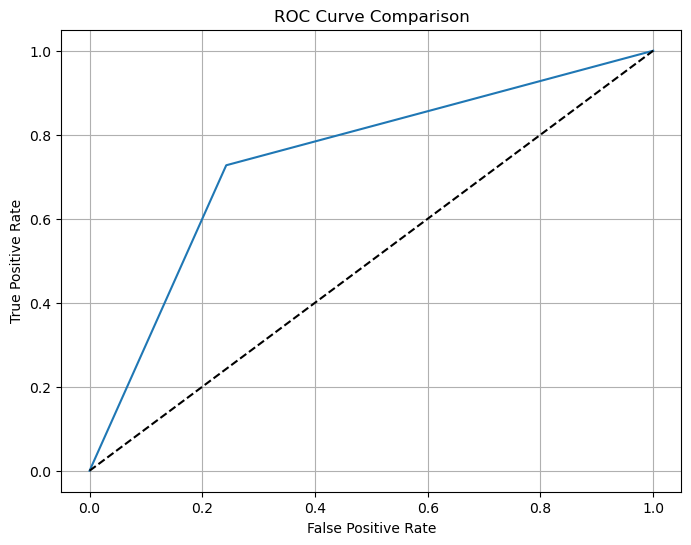

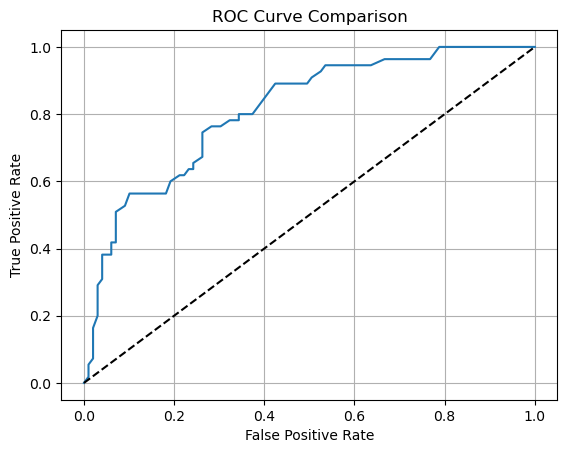

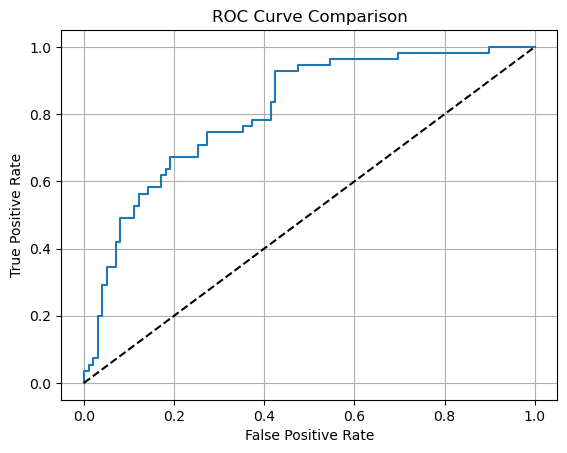

In [22]:
# Diabetes Model Comparison Notebook

# Step 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Step 2: Load dataset
df = pd.read_csv("diabetes.csv")
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

# Step 3: Preprocessing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train all models
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting:": GradientBoostingClassifier(n_estimators=100,learning_rate=0.1, max_depth=3, random_state=42)
}

results = []
roc_curves = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    results.append({
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': accuracy_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })
    
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_curves[name] = (fpr, tpr)

# Step 5: Show comparison table
results_df = pd.DataFrame(results)
display(results_df)

# Step 6: Plot ROC Curves
plt.figure(figsize=(8, 6))
for name, (fpr, tpr) in roc_curves.items():
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, models[name].predict_proba(X_test_scaled)[:, 1]):.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve Comparison')
    plt.grid(True)
    plt.show()

# Step 7: Summary cell 
from IPython.display import Markdown
#Markdown("""
### Summary
#- **Best Accuracy**:
#- **Best F1 Score**:
#- **Bet ROC AUC**:



